In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [69]:
# Load the dataset
df = pd.read_csv('station_data_dataverse.csv')

# Display first few rows
print(df.head())

# Show DataFrame structure
print(df.info())

# Show basic statistics
print(df.describe(include='all'))

# Check for missing values
print(df.isnull().sum())

# Check data types of each column
print(df.dtypes)


   sessionId  kwhTotal  dollars              created                ended  \
0    1366563      7.78     0.00  0014-11-18 15:40:26  0014-11-18 17:11:04   
1    3075723      9.74     0.00  0014-11-19 17:40:26  0014-11-19 19:51:04   
2    4228788      6.76     0.58  0014-11-21 12:05:46  0014-11-21 16:46:04   
3    3173284      6.17     0.00  0014-12-03 19:16:12  0014-12-03 21:02:18   
4    3266500      0.93     0.00  0014-12-11 20:56:11  0014-12-11 21:14:06   

   startTime  endTime  chargeTimeHrs weekday platform  ...  managerVehicle  \
0         15       17       1.510556     Tue  android  ...               0   
1         17       19       2.177222     Wed  android  ...               0   
2         12       16       4.671667     Fri  android  ...               0   
3         19       21       1.768333     Wed  android  ...               0   
4         20       21       0.298611     Thu  android  ...               0   

   facilityType  Mon  Tues  Wed  Thurs  Fri  Sat  Sun  reportedZip  

In [70]:
#describe data
df[['kwhTotal','dollars','startTime','endTime','chargeTimeHrs','distance']].describe()

,kwhTotal,dollars,startTime,endTime,chargeTimeHrs,distance
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,2330.000000
mean,5.809629,0.118268,13.743446,16.455965,2.841488,18.652378
std,2.892727,0.492562,3.204370,3.406732,1.507472,11.420571
min,0.000000,0.000000,0.000000,0.000000,0.012500,0.856911
25%,4.350000,0.000000,11.000000,14.000000,2.110278,5.135871
50%,6.230000,0.000000,13.000000,16.000000,2.808889,21.023826
75%,6.830000,0.000000,17.000000,20.000000,3.544167,27.285053
max,23.680000,7.500000,23.000000,23.000000,55.238056,43.059292


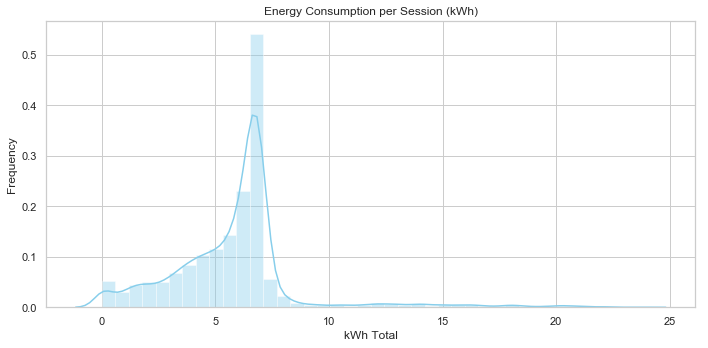

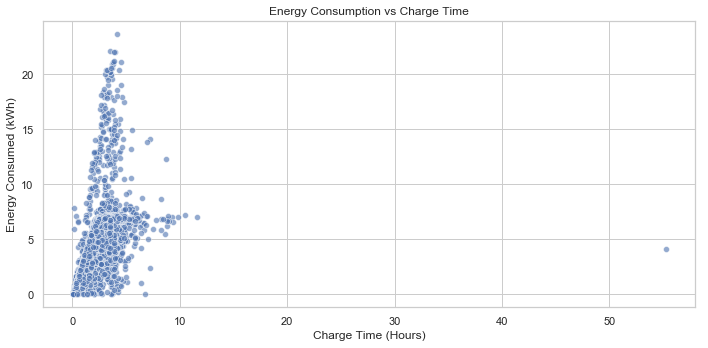

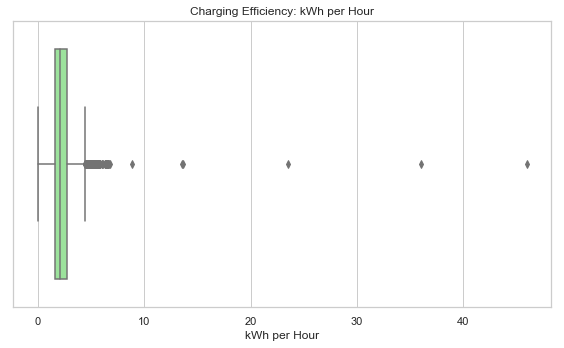

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("station_data_dataverse.csv")

# Filter out sessions with 0 charge time to avoid division errors
df = df[df['chargeTimeHrs'] > 0]

# Calculate extra metrics
df['kwh_per_hour'] = df['kwhTotal'] / df['chargeTimeHrs']
df['cost_per_kwh'] = df['dollars'] / df['kwhTotal']

# Set Seaborn style
sns.set(style="whitegrid")

# 1. Histogram (using distplot instead of histplot)
plt.figure(figsize=(10, 5))
sns.distplot(df['kwhTotal'], bins=40, color='skyblue', hist=True, kde=True)
plt.title("Energy Consumption per Session (kWh)")
plt.xlabel("kWh Total")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 2. Scatter plot: Charge time vs energy consumed
plt.figure(figsize=(10, 5))
sns.scatterplot(x='chargeTimeHrs', y='kwhTotal', data=df, alpha=0.6)
plt.title("Energy Consumption vs Charge Time")
plt.xlabel("Charge Time (Hours)")
plt.ylabel("Energy Consumed (kWh)")
plt.tight_layout()
plt.show()

# 3. Box plot: kWh per hour (Efficiency)
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['kwh_per_hour'], color='lightgreen')
plt.title("Charging Efficiency: kWh per Hour")
plt.xlabel("kWh per Hour")
plt.tight_layout()
plt.show()


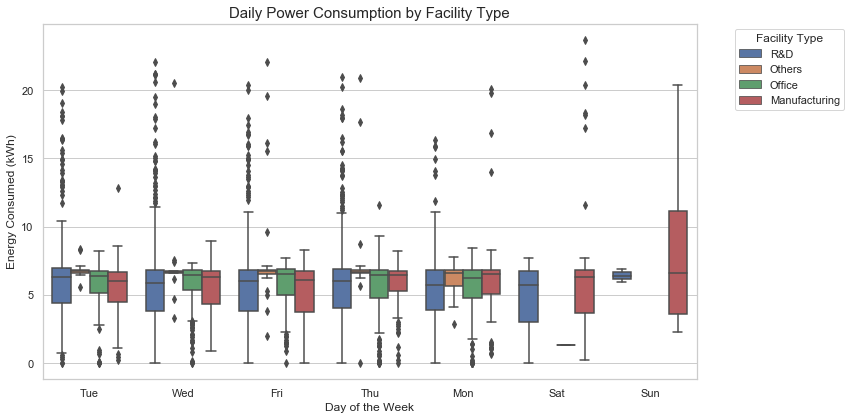

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert facilityType to categorical labels
df['facilityType'] = df['facilityType'].replace({
    1: 'Manufacturing',
    2: 'Office',
    3: 'R&D',
    4: 'Others'
})

# Set plot style
sns.set(style="whitegrid")

# Plot: Daily Power Consumption by Weekday and Facility Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='weekday', y='kwhTotal', hue='facilityType')
plt.title('Daily Power Consumption by Facility Type', fontsize=15)
plt.xlabel('Day of the Week')
plt.ylabel('Energy Consumed (kWh)')
plt.legend(title='Facility Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [73]:
# Replace facilityType codes
df['facilityType'] = df['facilityType'].replace({
    1: 'Manufacturing',
    2: 'Office',
    3: 'R&D',
    4: 'Others'
})

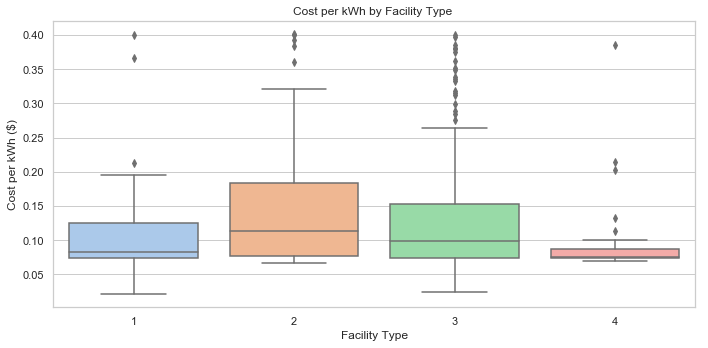

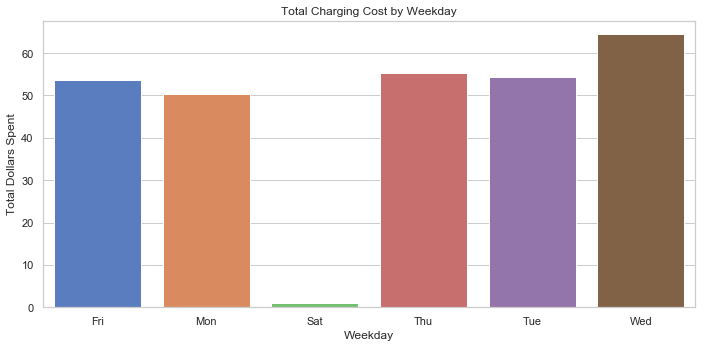

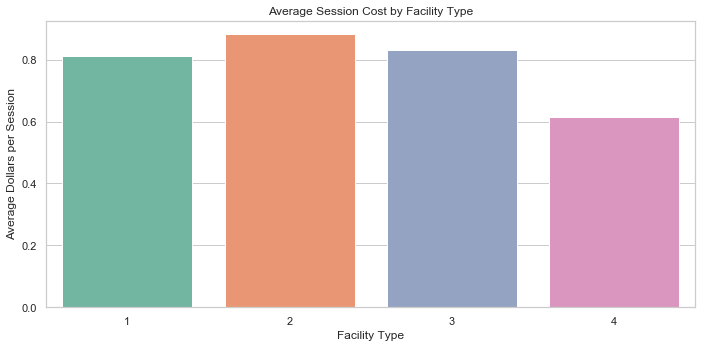

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("station_data_dataverse.csv")



# Drop rows with invalid values
df = df[(df['kwhTotal'] > 0) & (df['dollars'] > 0)].dropna(subset=['weekday', 'facilityType'])

# Calculate cost per kWh
df['cost_per_kwh'] = df['dollars'] / df['kwhTotal']

# --- Remove outliers using IQR ---
Q1 = df['cost_per_kwh'].quantile(0.25)
Q3 = df['cost_per_kwh'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['cost_per_kwh'] >= lower_bound) & (df['cost_per_kwh'] <= upper_bound)]

# Set plot style
sns.set(style="whitegrid")

# 1. Box Plot: Cost per kWh by Facility Type
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='facilityType', y='cost_per_kwh', palette='pastel')
plt.title('Cost per kWh by Facility Type ')
plt.xlabel('Facility Type')
plt.ylabel('Cost per kWh ($)')
plt.tight_layout()
plt.show()

# 2. Bar Chart: Total Cost by Weekday
cost_by_day = df.groupby('weekday')['dollars'].sum().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(data=cost_by_day, x='weekday', y='dollars', palette='muted')
plt.title('Total Charging Cost by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Dollars Spent')
plt.tight_layout()
plt.show()

# 3. Bar Chart: Average Session Cost by Facility Type
cost_by_facility = df.groupby('facilityType')['dollars'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(data=cost_by_facility, x='facilityType', y='dollars', palette='Set2')
plt.title('Average Session Cost by Facility Type')
plt.xlabel('Facility Type')
plt.ylabel('Average Dollars per Session')
plt.tight_layout()
plt.show()


In [78]:
# --- Remove outliers ONLY from chargeTimeHrs ---
# Load dataset
df = pd.read_csv("station_data_dataverse.csv")
Q1 = df['chargeTimeHrs'].quantile(0.25)
Q3 = df['chargeTimeHrs'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['chargeTimeHrs'] >= lower_bound) & (df['chargeTimeHrs'] <= upper_bound)]

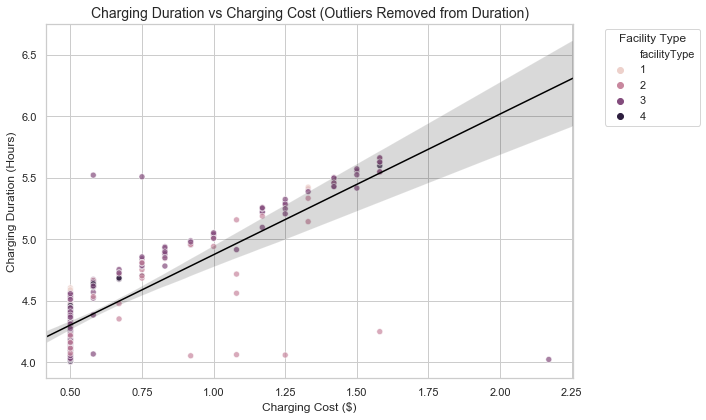

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Filter invalid or zero values
df = df[(df['dollars'] > 0) & (df['chargeTimeHrs'] > 0)]

# Set plot style
sns.set(style="whitegrid")

# Plot: Cost vs Duration (Duration on Y-axis)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='dollars', y='chargeTimeHrs', hue='facilityType', alpha=0.7)
sns.regplot(data=df, x='dollars', y='chargeTimeHrs', scatter=False, color='black', line_kws={"linewidth":1.5})
plt.title('Charging Duration vs Charging Cost (Outliers Removed from Duration)', fontsize=14)
plt.xlabel('Charging Cost ($)')
plt.ylabel('Charging Duration (Hours)')
plt.legend(title='Facility Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Charging Duration (hrs)')

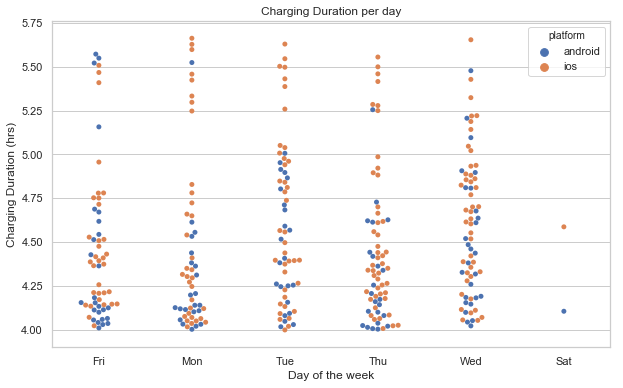

In [80]:
#visualize mean chargeTimeHr per day
plt.figure(figsize=(10,6))
sns.swarmplot(data=df, y='chargeTimeHrs', x='weekday', hue='platform')
plt.title('Charging Duration per day')
plt.xlabel('Day of the week')
plt.ylabel('Charging Duration (hrs)')